In [25]:
import matplotlib.pyplot as plt
import numpy as np
import json
from net.model_HCQ import HCQ
import numpy as np
from net.data import get_dataloader
import torch
import time
from collections import OrderedDict

In [26]:
with open('model/1.1 Pipeline Experiments/acc_loss_1_linkage_designed/acc_dict.json', 'r') as f:
    acc_dict = json.loads(f.read())
with open('model/1.1 Pipeline Experiments/acc_loss_1_linkage_designed/clusters_nums_dict.json', 'r') as f:
    clusters_nums_dict = json.loads(f.read())

In [27]:
avg_acc = [74.80000305175781, 74.4000015258789, 75.1500015258789, 73.79999542236328, 74.3499984741211, 74.29999542236328, 74.0999984741211, 74.80000305175781, 73.6500015258789, 73.5999984741211, 74.9000015258789, 74.6500015258789, 75.3499984741211, 75.44999694824219, 74.94999694824219, 74.4000015258789, 74.75, 74.9000015258789, 75.0999984741211, 74.5, 73.79999542236328, 75.4000015258789, 74.29999542236328, 74.19999694824219, 74.55000305175781, 74.44999694824219, 73.94999694824219, 73.4000015258789, 74.1500015258789, 75.5, 74.94999694824219, 73.79999542236328, 73.94999694824219, 74.80000305175781, 74.69999694824219, 75.3499984741211, 74.8499984741211, 74.4000015258789, 74.75, 73.8499984741211, 73.5999984741211, 74.25, 74.69999694824219, 74.8499984741211, 75.1500015258789, 75.44999694824219, 74.9000015258789, 74.1500015258789, 74.55000305175781, 74.25, 73.8499984741211, 73.25, 74.5999984741211, 74.0999984741211, 75.19999694824219, 74.4000015258789, 75.1500015258789, 74.55000305175781, 74.94999694824219, 74.19999694824219, 74.0999984741211, 74.19999694824219, 75.19999694824219, 74.1500015258789, 73.9000015258789, 74.5999984741211, 74.8499984741211, 73.54999542236328, 75.4000015258789, 74.6500015258789, 75.30000305175781, 74.8499984741211, 75.55000305175781, 73.69999694824219, 73.6500015258789, 74.29999542236328, 74.1500015258789, 74.04999542236328, 75.05000305175781, 74.5, 74.69999694824219, 74.69999694824219, 74.25, 74.69999694824219, 75.75, 74.80000305175781, 74.80000305175781, 74.9000015258789, 74.69999694824219, 75.3499984741211, 74.69999694824219, 74.55000305175781, 75.0, 75.19999694824219, 74.75, 75.80000305175781, 74.3499984741211, 74.69999694824219, 74.9000015258789, 74.55000305175781, 73.0, 74.3499984741211, 75.19999694824219, 75.25, 73.8499984741211, 73.94999694824219, 73.5999984741211, 75.8499984741211, 74.0, 74.94999694824219, 75.3499984741211, 75.4000015258789, 74.25, 74.3499984741211, 73.9000015258789, 74.3499984741211, 75.0999984741211, 74.5, 74.4000015258789, 75.70000457763672, 74.6500015258789, 74.44999694824219, 74.75, 75.05000305175781, 74.29999542236328, 75.1500015258789, 74.3499984741211, 74.19999694824219, 74.3499984741211, 74.9000015258789, 73.9000015258789, 74.29999542236328, 75.1500015258789, 74.3499984741211, 74.0999984741211, 75.1500015258789, 74.80000305175781, 73.94999694824219, 75.05000305175781, 73.25, 74.8499984741211, 74.29999542236328, 74.6500015258789, 74.8499984741211, 74.80000305175781, 75.3499984741211, 75.25, 74.5999984741211, 74.69999694824219, 74.44999694824219, 73.79999542236328, 74.4000015258789, 74.75, 74.44999694824219, 74.8499984741211, 74.0, 74.29999542236328, 74.04999542236328, 75.1500015258789, 74.9000015258789, 74.75, 73.8499984741211, 74.69999694824219, 75.4000015258789, 74.8499984741211, 74.75, 75.19999694824219, 74.0, 75.1500015258789, 75.3499984741211, 74.75, 75.05000305175781, 74.5999984741211, 75.05000305175781, 75.0, 75.0999984741211, 74.0999984741211, 74.5999984741211, 74.55000305175781, 74.19999694824219, 74.80000305175781, 73.6500015258789, 74.3499984741211, 74.4000015258789, 74.44999694824219, 74.9000015258789, 73.8499984741211, 73.8499984741211, 74.5, 74.04999542236328, 74.80000305175781, 74.1500015258789, 74.29999542236328, 74.4000015258789, 74.9000015258789, 74.29999542236328, 74.8499984741211, 74.9000015258789, 73.9000015258789, 74.5, 73.9000015258789, 74.9000015258789, 74.6500015258789, 73.94999694824219, 75.3499984741211, 74.6500015258789, 74.0999984741211, 74.75, 74.9000015258789, 74.9000015258789, 75.44999694824219, 74.29999542236328, 75.0999984741211, 74.55000305175781, 74.55000305175781, 74.55000305175781, 74.5, 74.1500015258789, 74.25, 74.29999542236328, 74.4000015258789, 74.04999542236328, 73.94999694824219, 74.25, 74.5, 75.19999694824219, 74.04999542236328, 75.05000305175781, 75.5, 74.44999694824219, 74.5999984741211, 74.19999694824219, 74.25, 74.8499984741211, 74.1500015258789, 73.6500015258789, 73.29999542236328, 73.9000015258789, 73.8499984741211, 73.5999984741211, 73.69999694824219]
avg_number = [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]
single_acc = [74.75, 74.6500015258789, 74.25, 74.94999694824219, 74.5, 75.30000305175781, 74.8499984741211, 74.1500015258789, 73.75, 74.5, 74.5, 74.3499984741211, 74.3499984741211, 74.5, 75.0999984741211, 74.3499984741211, 74.75, 74.94999694824219, 74.19999694824219, 74.44999694824219, 74.29999542236328, 74.69999694824219, 74.94999694824219, 74.0999984741211, 74.25, 73.79999542236328, 74.9000015258789, 75.30000305175781, 74.69999694824219, 75.1500015258789, 75.0999984741211, 75.25, 74.9000015258789, 75.5, 75.19999694824219, 74.44999694824219, 74.75, 74.04999542236328, 75.0, 74.0, 75.19999694824219, 74.25, 74.5, 74.5999984741211, 75.0999984741211, 75.5, 74.4000015258789, 74.25, 75.19999694824219, 75.9000015258789, 75.05000305175781, 74.4000015258789, 74.69999694824219, 74.69999694824219, 74.3499984741211, 74.29999542236328, 75.0999984741211, 74.8499984741211, 74.75, 73.8499984741211, 74.19999694824219, 75.0, 74.75, 73.5999984741211, 74.0, 74.75, 74.94999694824219, 74.6500015258789, 74.6500015258789, 74.0999984741211, 75.0999984741211, 74.9000015258789, 74.19999694824219, 75.05000305175781, 74.8499984741211, 74.75, 74.8499984741211, 74.29999542236328, 76.0, 75.30000305175781, 73.8499984741211, 75.19999694824219, 75.0999984741211, 74.5, 74.5, 74.29999542236328, 74.8499984741211, 74.4000015258789, 74.80000305175781, 75.0999984741211, 73.5999984741211, 74.44999694824219, 73.79999542236328, 74.3499984741211, 75.05000305175781, 75.05000305175781, 74.3499984741211, 75.3499984741211, 73.69999694824219, 74.25, 74.69999694824219, 74.5, 74.0999984741211, 74.69999694824219, 74.5999984741211, 74.9000015258789, 74.8499984741211, 75.0, 74.5999984741211, 74.75, 73.5, 74.5, 74.55000305175781, 74.19999694824219, 74.3499984741211, 74.1500015258789, 75.75, 75.4000015258789, 74.44999694824219, 74.04999542236328, 74.4000015258789, 74.3499984741211, 73.9000015258789, 74.55000305175781, 75.1500015258789, 74.69999694824219, 75.44999694824219, 74.1500015258789, 74.8499984741211, 74.5, 75.25, 74.75, 73.9000015258789, 74.69999694824219, 75.0999984741211, 74.04999542236328, 74.5999984741211, 75.0999984741211, 75.19999694824219, 74.80000305175781, 74.5, 74.8499984741211, 74.25, 74.4000015258789, 75.25, 74.04999542236328, 73.94999694824219, 74.3499984741211, 74.5999984741211, 75.4000015258789, 74.94999694824219, 75.5999984741211, 74.8499984741211, 74.19999694824219, 73.54999542236328, 74.5, 74.6500015258789, 74.55000305175781, 74.44999694824219, 74.0, 74.1500015258789, 75.6500015258789, 74.19999694824219, 74.4000015258789, 74.69999694824219, 73.79999542236328, 73.69999694824219, 74.6500015258789, 74.5999984741211, 74.8499984741211, 73.5999984741211, 74.3499984741211, 74.9000015258789, 74.3499984741211, 75.1500015258789, 74.19999694824219, 74.55000305175781, 74.25, 73.5, 74.55000305175781, 74.19999694824219, 74.9000015258789, 74.55000305175781, 74.0, 73.79999542236328, 73.5999984741211, 74.55000305175781, 74.0999984741211, 73.3499984741211, 73.44999694824219, 73.5999984741211, 74.29999542236328, 73.8499984741211, 74.04999542236328, 75.19999694824219, 74.1500015258789]
single_number = [214.0, 213.0, 212.0, 211.0, 210.0, 209.0, 208.0, 207.0, 206.0, 205.0, 204.0, 203.0, 202.0, 201.0, 200.0, 199.0, 198.0, 197.0, 196.0, 195.0, 194.0, 193.0, 192.0, 191.0, 190.0, 189.0, 188.0, 187.0, 186.0, 185.0, 184.0, 183.0, 182.0, 181.0, 180.0, 179.0, 178.0, 177.0, 176.0, 175.0, 174.0, 173.0, 172.0, 171.0, 170.0, 169.0, 168.0, 167.0, 166.0, 165.0, 164.0, 163.0, 162.0, 161.0, 160.0, 159.0, 158.0, 157.0, 156.0, 155.0, 154.0, 153.0, 152.0, 151.0, 150.0, 149.0, 148.0, 147.0, 146.0, 145.0, 144.0, 143.0, 142.0, 141.0, 140.0, 139.0, 138.0, 137.0, 136.0, 135.0, 134.0, 133.0, 132.0, 131.0, 130.0, 129.0, 128.0, 127.0, 126.0, 125.0, 124.0, 123.0, 122.0, 121.0, 120.0, 119.0, 118.0, 117.0, 116.0, 115.0, 114.0, 113.0, 112.0, 111.0, 110.0, 109.0, 108.0, 107.0, 106.0, 105.0, 104.0, 103.0, 102.0, 101.0, 100.0, 99.0, 98.0, 97.0, 96.0, 95.0, 94.0, 93.0, 92.0, 91.0, 90.0, 89.0, 88.0, 87.0, 86.0, 85.0, 84.0, 83.0, 82.0, 81.0, 80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 70.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0, 61.0, 60.0, 59.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0]
complete_acc = [74.75, 75.0, 74.3499984741211, 74.3499984741211, 75.30000305175781, 75.25, 75.5, 74.9000015258789, 75.0999984741211, 74.25, 73.5999984741211, 75.05000305175781, 75.3499984741211, 74.5, 74.9000015258789, 74.25, 74.1500015258789, 75.0999984741211, 75.30000305175781, 74.0, 74.75, 74.80000305175781, 74.3499984741211, 74.1500015258789, 74.1500015258789, 75.70000457763672, 74.1500015258789, 74.44999694824219, 75.0999984741211, 73.94999694824219, 74.5, 73.75, 73.9000015258789, 73.8499984741211, 73.94999694824219, 74.69999694824219, 74.9000015258789, 74.75, 75.44999694824219, 74.94999694824219, 74.94999694824219, 74.55000305175781, 73.44999694824219, 74.8499984741211, 75.30000305175781, 75.44999694824219, 74.29999542236328, 73.3499984741211, 74.19999694824219, 74.6500015258789, 74.25, 75.25, 75.6500015258789, 73.54999542236328, 74.29999542236328, 74.6500015258789, 74.75, 74.29999542236328, 74.5, 75.1500015258789, 75.0, 74.25, 75.1500015258789, 74.94999694824219, 74.69999694824219, 74.75, 73.44999694824219, 74.1500015258789, 74.80000305175781, 75.25, 74.29999542236328, 74.6500015258789, 74.55000305175781, 75.95000457763672, 74.75, 74.75, 73.9000015258789, 74.8499984741211, 74.1500015258789, 73.79999542236328, 74.9000015258789, 74.25, 74.9000015258789, 74.75, 74.80000305175781, 74.75, 74.19999694824219, 73.8499984741211, 74.0, 74.5999984741211, 74.55000305175781, 74.5999984741211, 73.79999542236328, 75.3499984741211, 74.3499984741211, 74.94999694824219, 75.0999984741211, 74.75, 75.0, 74.19999694824219, 74.94999694824219, 74.29999542236328, 74.3499984741211, 74.0, 74.3499984741211, 74.0999984741211, 73.9000015258789, 75.05000305175781, 73.8499984741211, 74.0999984741211, 74.5, 74.9000015258789, 74.0, 74.69999694824219, 74.94999694824219, 75.0, 74.0999984741211, 75.19999694824219, 74.55000305175781, 75.4000015258789, 74.6500015258789, 74.44999694824219, 75.3499984741211, 75.25, 74.9000015258789, 74.9000015258789, 74.6500015258789, 74.6500015258789, 73.6500015258789, 74.0999984741211, 74.9000015258789, 74.9000015258789, 74.29999542236328, 74.75, 74.69999694824219, 74.1500015258789, 74.25, 74.69999694824219, 74.4000015258789, 74.3499984741211, 73.69999694824219, 74.44999694824219, 74.9000015258789, 74.8499984741211, 75.0999984741211, 74.19999694824219, 74.25, 74.25, 73.69999694824219, 75.55000305175781, 73.69999694824219, 74.29999542236328, 74.69999694824219, 73.75, 74.0, 74.8499984741211, 74.25, 74.29999542236328, 74.0999984741211, 73.3499984741211, 74.04999542236328, 74.69999694824219, 75.19999694824219, 74.9000015258789, 74.5999984741211, 73.8499984741211, 74.80000305175781, 74.55000305175781, 74.0999984741211, 73.69999694824219, 73.9000015258789, 74.5999984741211, 75.5, 74.19999694824219, 74.5999984741211, 73.94999694824219, 75.0, 74.1500015258789, 74.80000305175781, 74.69999694824219, 74.9000015258789, 75.1500015258789, 74.4000015258789, 74.0999984741211, 74.55000305175781, 74.75, 74.5999984741211, 74.6500015258789, 74.44999694824219, 73.6500015258789, 74.55000305175781, 74.80000305175781, 74.75, 74.55000305175781, 74.0999984741211, 74.94999694824219, 75.0, 75.05000305175781, 74.9000015258789, 74.5999984741211, 75.55000305175781, 74.44999694824219, 74.5999984741211, 74.94999694824219, 74.3499984741211, 74.94999694824219, 75.05000305175781, 75.30000305175781, 75.3499984741211, 73.79999542236328, 74.5999984741211, 74.5, 74.1500015258789, 74.29999542236328, 74.80000305175781, 74.69999694824219, 74.44999694824219, 74.9000015258789, 74.80000305175781, 74.25, 74.44999694824219, 74.04999542236328, 74.69999694824219, 74.8499984741211, 73.69999694824219, 74.0, 73.6500015258789, 74.0999984741211]
complete_number = [235.0, 234.0, 233.0, 232.0, 231.0, 230.0, 229.0, 228.0, 227.0, 226.0, 225.0, 224.0, 223.0, 222.0, 221.0, 220.0, 219.0, 218.0, 217.0, 216.0, 215.0, 214.0, 213.0, 212.0, 211.0, 210.0, 209.0, 208.0, 207.0, 206.0, 205.0, 204.0, 203.0, 202.0, 201.0, 200.0, 199.0, 198.0, 197.0, 196.0, 195.0, 194.0, 193.0, 192.0, 191.0, 190.0, 189.0, 188.0, 187.0, 186.0, 185.0, 184.0, 183.0, 182.0, 181.0, 180.0, 179.0, 178.0, 177.0, 176.0, 175.0, 174.0, 173.0, 172.0, 171.0, 170.0, 169.0, 168.0, 167.0, 166.0, 165.0, 164.0, 163.0, 162.0, 161.0, 160.0, 159.0, 158.0, 157.0, 156.0, 155.0, 154.0, 153.0, 152.0, 151.0, 150.0, 149.0, 148.0, 147.0, 146.0, 145.0, 144.0, 143.0, 142.0, 141.0, 140.0, 139.0, 138.0, 137.0, 136.0, 135.0, 134.0, 133.0, 132.0, 131.0, 130.0, 129.0, 128.0, 127.0, 126.0, 125.0, 124.0, 123.0, 122.0, 121.0, 120.0, 119.0, 118.0, 117.0, 116.0, 115.0, 114.0, 113.0, 112.0, 111.0, 110.0, 109.0, 108.0, 107.0, 106.0, 105.0, 104.0, 103.0, 102.0, 101.0, 100.0, 99.0, 98.0, 97.0, 96.0, 95.0, 94.0, 93.0, 92.0, 91.0, 90.0, 89.0, 88.0, 87.0, 86.0, 85.0, 84.0, 83.0, 82.0, 81.0, 80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 70.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0, 61.0, 60.0, 59.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0]
dc_acc = [75.1500015258789, 74.6500015258789, 73.9000015258789, 74.8499984741211, 74.4000015258789, 74.55000305175781, 75.0, 73.44999694824219, 74.0999984741211, 74.44999694824219, 74.8499984741211, 72.75, 74.44999694824219, 74.19999694824219, 75.30000305175781, 73.75, 74.9000015258789, 73.54999542236328, 73.4000015258789, 75.70000457763672, 74.25, 73.5999984741211, 74.80000305175781, 72.0, 73.79999542236328]
dc_number = [250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
designed_acc = [74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.69999694824219, 74.69999694824219, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.69999694824219, 74.69999694824219, 74.69999694824219, 74.75, 74.69999694824219, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.80000305175781, 74.80000305175781, 74.80000305175781, 74.80000305175781, 74.75, 74.75, 74.69999694824219, 74.75, 74.75, 74.69999694824219, 74.69999694824219, 74.75, 74.75, 74.69999694824219, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.75, 74.69999694824219, 74.69999694824219, 74.75, 74.80000305175781, 74.69999694824219, 74.69999694824219, 74.69999694824219, 74.69999694824219, 74.69999694824219, 74.5999984741211, 74.6500015258789, 74.69999694824219, 74.6500015258789, 74.69999694824219, 74.6500015258789, 74.69999694824219, 74.69999694824219, 74.69999694824219, 74.69999694824219, 74.69999694824219, 74.75, 74.75, 74.75, 74.69999694824219, 74.69999694824219, 74.69999694824219, 74.6500015258789, 74.6500015258789, 74.5999984741211, 74.5999984741211, 74.5999984741211, 74.5999984741211, 74.5999984741211, 74.6500015258789, 74.6500015258789, 74.6500015258789, 74.69999694824219, 74.69999694824219, 74.75, 74.75, 74.69999694824219, 74.69999694824219, 74.75, 74.69999694824219, 74.69999694824219, 74.75, 74.75, 74.75, 74.75, 74.80000305175781, 74.75, 74.75, 74.69999694824219, 74.69999694824219, 74.75, 74.80000305175781, 74.80000305175781, 74.69999694824219, 74.80000305175781, 74.75, 74.80000305175781, 74.75, 74.8499984741211, 74.75, 74.80000305175781, 74.80000305175781, 74.75, 74.80000305175781, 74.80000305175781, 74.80000305175781, 74.80000305175781, 74.80000305175781, 74.75, 74.75, 74.75, 74.80000305175781, 74.75, 74.80000305175781, 74.8499984741211, 74.80000305175781, 74.69999694824219, 74.75, 74.75, 74.69999694824219, 74.69999694824219, 74.6500015258789, 74.69999694824219, 74.80000305175781, 74.80000305175781, 74.75, 74.75, 74.8499984741211, 74.69999694824219, 74.80000305175781, 74.80000305175781, 74.9000015258789, 74.9000015258789, 74.8499984741211, 74.8499984741211, 74.80000305175781, 74.80000305175781, 74.8499984741211, 74.69999694824219, 74.80000305175781, 74.8499984741211, 74.80000305175781, 74.9000015258789, 74.80000305175781, 74.80000305175781, 74.75, 74.8499984741211, 74.75, 74.75, 74.75, 74.69999694824219, 74.75, 74.75, 74.75, 74.8499984741211, 75.0, 74.9000015258789, 75.0, 74.80000305175781, 74.75, 74.75, 74.75, 74.8499984741211, 75.0, 75.05000305175781, 75.0, 75.0999984741211, 74.80000305175781, 74.8499984741211, 74.75, 74.94999694824219, 74.8499984741211, 74.94999694824219, 74.9000015258789, 74.8499984741211, 74.8499984741211, 75.0, 75.0, 74.75, 74.55000305175781, 74.29999542236328, 74.29999542236328, 74.19999694824219, 74.25, 74.0999984741211, 74.0, 74.04999542236328, 74.04999542236328, 74.1500015258789, 74.04999542236328, 74.29999542236328, 74.0999984741211, 74.04999542236328, 73.9000015258789, 73.94999694824219, 73.8499984741211, 73.8499984741211]
designed_number = [252.0, 251.0, 250.0, 249.0, 248.0, 247.0, 246.0, 245.0, 244.0, 243.0, 242.0, 241.0, 240.0, 239.0, 238.0, 237.0, 236.0, 235.0, 234.0, 233.0, 232.0, 231.0, 230.0, 229.0, 228.0, 227.0, 226.0, 225.0, 224.0, 223.0, 222.0, 221.0, 220.0, 219.0, 218.0, 217.0, 216.0, 215.0, 214.0, 213.0, 212.0, 211.0, 210.0, 209.0, 208.0, 207.0, 206.0, 205.0, 204.0, 203.0, 202.0, 201.0, 200.0, 199.0, 198.0, 197.0, 196.0, 195.0, 194.0, 193.0, 192.0, 191.0, 190.0, 189.0, 188.0, 187.0, 186.0, 185.0, 184.0, 183.0, 182.0, 181.0, 180.0, 179.0, 178.0, 177.0, 176.0, 175.0, 174.0, 173.0, 172.0, 171.0, 170.0, 169.0, 168.0, 167.0, 166.0, 165.0, 164.0, 163.0, 162.0, 161.0, 160.0, 159.0, 158.0, 157.0, 156.0, 155.0, 154.0, 153.0, 152.0, 151.0, 150.0, 149.0, 148.0, 147.0, 146.0, 145.0, 144.0, 143.0, 142.0, 141.0, 140.0, 139.0, 138.0, 137.0, 136.0, 135.0, 134.0, 133.0, 132.0, 131.0, 130.0, 129.0, 128.0, 127.0, 126.0, 125.0, 124.0, 123.0, 122.0, 121.0, 120.0, 119.0, 118.0, 117.0, 116.0, 115.0, 114.0, 113.0, 112.0, 111.0, 110.0, 109.0, 108.0, 107.0, 106.0, 105.0, 104.0, 103.0, 102.0, 101.0, 100.0, 99.0, 98.0, 97.0, 96.0, 95.0, 94.0, 93.0, 92.0, 91.0, 90.0, 89.0, 88.0, 87.0, 86.0, 85.0, 84.0, 83.0, 82.0, 81.0, 80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 70.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0, 61.0, 60.0, 59.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 11.0, 9.0]

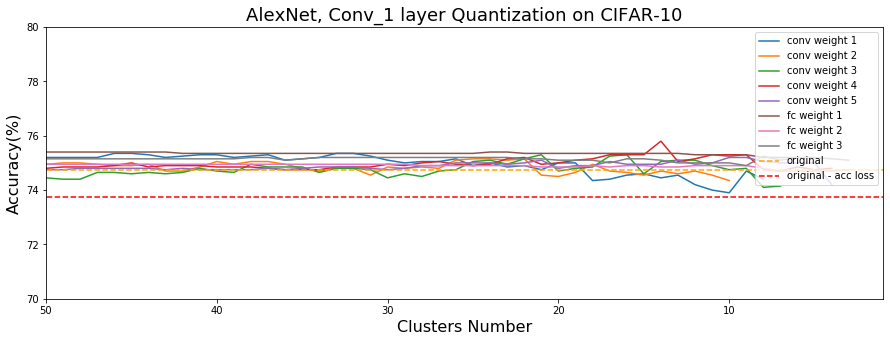

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(-np.array(clusters_nums_dict['conv_weight_1']), acc_dict['conv_weight_1'], label='conv weight 1')
plt.plot(-np.array(clusters_nums_dict['conv_weight_2']), acc_dict['conv_weight_2'], label='conv weight 2')
plt.plot(-np.array(clusters_nums_dict['conv_weight_3']), acc_dict['conv_weight_3'], label='conv weight 3')
plt.plot(-np.array(clusters_nums_dict['conv_weight_4']), acc_dict['conv_weight_4'], label='conv weight 4')
plt.plot(-np.array(clusters_nums_dict['conv_weight_5']), acc_dict['conv_weight_5'], label='conv weight 5')
plt.plot(-np.array(clusters_nums_dict['fc_weight_1']), acc_dict['fc_weight_1'], label='fc weight 1')
plt.plot(-np.array(clusters_nums_dict['fc_weight_2']), acc_dict['fc_weight_2'], label='fc weight 2')
plt.plot(-np.array(clusters_nums_dict['fc_weight_3']), acc_dict['fc_weight_3'], label='fc weight 3')
# plt.plot(-np.array(single_number), single_acc, label='single HCQ ')
# plt.plot(-np.array(complete_number), complete_acc, label='complete HCQ ')
# plt.plot(-np.array(designed_number), designed_acc, label='designed HCQ ')
# plt.plot(-np.array(dc_number), dc_acc, label='Deep Compression with retrain')
plt.plot([i for i in range(-500, 100)], [74.75 for _ in range(-500, 100)], label='original',linestyle="--", color='orange')
plt.plot([i for i in range(-500, 100)], [73.75 for _ in range(-500, 100)], label='original - acc loss', linestyle="--", color='red')
plt.ylim([70, 80])
plt.xlim([-50, -1])
plt.xticks(ticks=[i for i in range(-50, 0, 10)], labels=[i for i in range(50, 0, -10)])
plt.xlabel('Clusters Number', size=16)
plt.ylabel('Accuracy(%)', size=16)
plt.title('AlexNet, Conv_1 layer Quantization on CIFAR-10', size=18)
plt.legend()
plt.show()
# plt.savefig('')

In [4]:
net = HCQ(10, dropout=0)

In [36]:
original_size = 0
quantized_size = 0
bit_width = [4,4,3,4,3,3,2,2]
tag = 0
for layer_name in net.layers:
    weights_num = net.layers[layer_name].data.numpy().reshape(-1).shape[0]
    if 'weight' in layer_name:
        original_size += 32 * weights_num
        quantized_size += bit_width[tag] * weights_num + 2** bit_width[tag] * 32
        tag += 1
    else:
        original_size += 32 * weights_num
        quantized_size += 32 * weights_num
print(original_size / quantized_size)

11.716126019067085
